<a href="https://www.kaggle.com/code/emres1k/top-football-leagues-scorers-eda?scriptVersionId=164748720" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction

<font color = 'blue'>
Content:
    
1. [Load and Check Data](#1)
1. [Variable description](#2)
    * [Univariate Variable Analysis](#3)
        * [Categorical Variable](#4)
        * [Numerical Variable](#5)
1. [Basic Data Analysis](#6)
1. [Missing Value](#7)
1. [Visualization](#8)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings("ignore")
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-football-leagues-scorers/Data.csv


<a id = "1"> </a>  
## 1. Load and Check Data:

In [2]:
data = pd.read_csv("/kaggle/input/top-football-leagues-scorers/Data.csv")

In [3]:
data.dtypes

Country                     object
League                      object
Club                        object
Player Names                object
Matches_Played               int64
Substitution                 int64
Mins                         int64
Goals                        int64
xG                         float64
xG Per Avg Match           float64
Shots                        int64
OnTarget                     int64
Shots Per Avg Match        float64
On Target Per Avg Match    float64
Year                         int64
dtype: object

In [4]:
data.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


In [5]:
data.shape

(660, 15)

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Matches_Played,660.0,22.371212,9.754658,2.00,14.000,24.000,31.0000,38.00
Substitution,660.0,3.224242,3.839498,0.00,0.000,2.000,5.0000,26.00
Mins,660.0,2071.416667,900.595049,264.00,1363.500,2245.500,2822.0000,4177.00
Goals,660.0,11.784848,5.982454,2.00,8.000,11.000,14.0000,37.00
xG,660.0,10.089606,5.724844,0.71,6.100,9.285,13.2525,32.54
xG Per Avg Match,660.0,0.476167,0.192831,0.07,0.340,0.435,0.5700,1.35
Shots,660.0,64.177273,34.941622,5.00,37.750,62.000,86.0000,208.00
OnTarget,660.0,28.365152,16.363149,2.00,17.000,26.000,37.0000,102.00
Shots Per Avg Match,660.0,2.948015,0.914906,0.80,2.335,2.845,3.3825,7.20
On Target Per Avg Match,660.0,1.315652,0.474239,0.24,0.980,1.250,1.5400,3.63


<a id = "2"> </a>  
## 2. Variable Description:
1. Country
1. League
1. Club
1. Matches_Played: number of matches played by the player
1. Substitution: number of matches the player entered from the substitute 
1. Mins: the player's total minutes played in all matches
1. Goals: the player's total goals played in all matches
1. xG: 'Expected goals' is a statistical metric used in football that gives more information about the quality of chances. The abbreviation of expected goals is 'xG'. 
1. xG Per Avg Match: ratio of the played matches and xG
1. Shots: number of shots taken by players (shot is a hitting the ball in an attempt to score a goal)
1. OnTarget: the number of the shots on target
1. Shots Per Avg Match
1. On Target Per Avg Match
1. Year: the year of player's data 

<a id = "3"> </a>  
# Univariate Variable Analysis

In [7]:
def bar_plot(variable):
   
    var = data[variable]
    var_value = var.value_counts()
    
    plt.figure(figsize = (9,3))
    plt.bar(var_value.index,var_value)
    plt.xticks(var_value.index,var_value.index.values)
    plt.ylabel("Frequency")
    plt.xlabel(variable)
    plt.show()
    

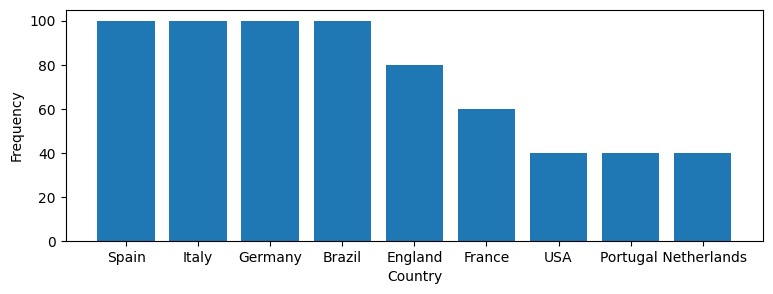

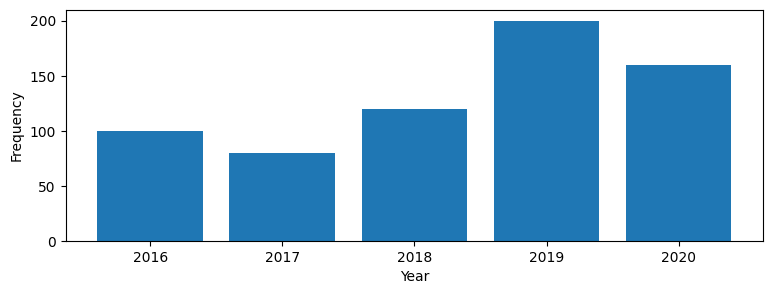

In [8]:
category1 = ["Country","Year"]
for c in category1:    
    bar_plot(c)

In [9]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(data[variable],bins=30)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title(f"{variable} distribution with hist")
    plt.show()

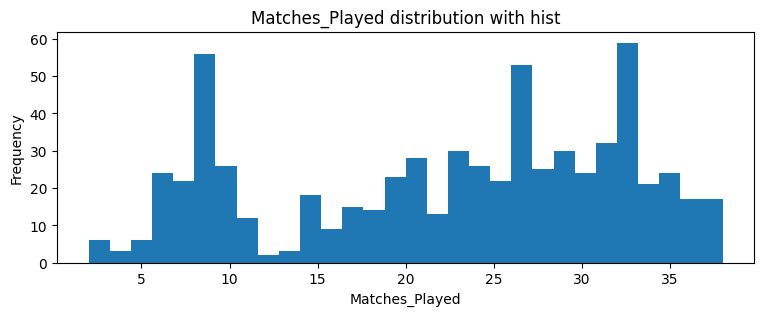

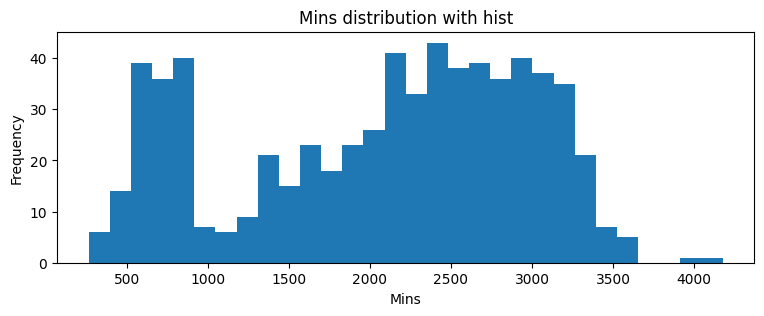

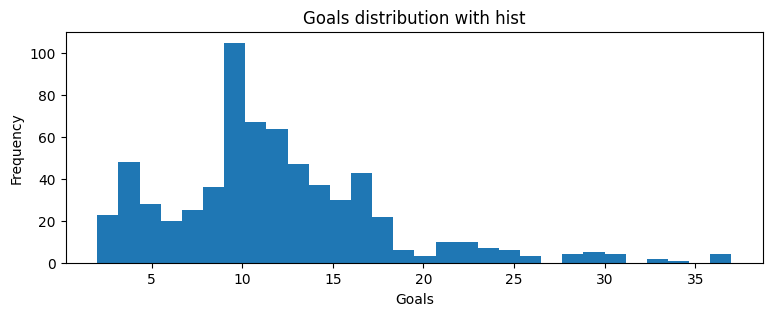

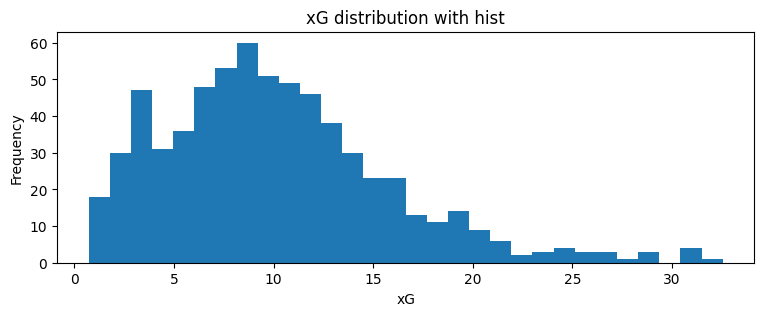

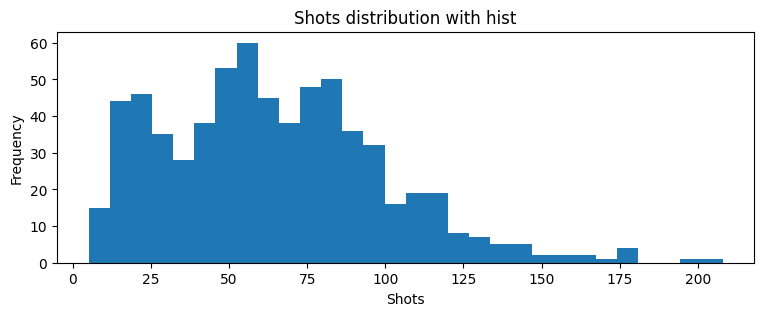

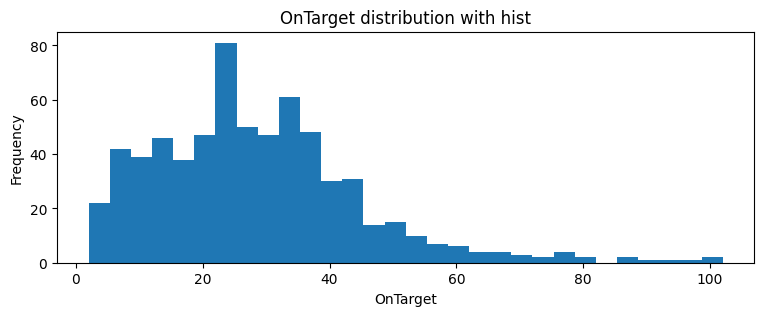

In [10]:
category2 = ["Matches_Played","Mins","Goals","xG","Shots","OnTarget"]
for n in category2:
    plot_hist(n)

<a id = "6"> </a>  
# Basic Data Analysis
* Country - xG
* Goal - xG
* Year - xG
* Club - xG

In [11]:

data[["Country","xG"]].groupby(["Country"], as_index = False).mean().sort_values(by="xG",ascending = False)

,Country,xG
7,Spain,11.988400
2,England,11.736875
5,Italy,11.413800
8,USA,10.411250
4,Germany,10.121300
1,Brazil,9.508200
3,France,8.658500
0,Netherlands,6.412000
6,Portugal,5.614500


In [12]:
data[["Goals","xG"]].groupby(["Goals"]).mean().sort_values(by="xG",ascending = False).head()

,xG
Goals,
33,31.855000
34,31.050000
30,30.520000
37,26.650000
31,26.326667


In [13]:
data[["Year","xG"]].groupby(["Year"]).mean().sort_values(by="xG",ascending = False).head()

,xG
Year,
2018,12.661917
2017,12.135500
2016,12.097400
2019,10.513300
2020,5.352938


In [14]:
top_scorers_df = data.sort_values(by="Goals", ascending=False)
top_scorers_df.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
12,Spain,La Liga,(BAR),Lionel Messi,32,2,2910,37,26.65,0.87,179,76,5.84,2.48,2016
391,Italy,Serie A,(LAZ),Ciro Immobile,36,1,3371,36,26.61,0.75,142,71,4.00,2.00,2019
317,USA,MLS,(LAF),Carlos Vela,33,0,3128,36,25.35,0.77,167,75,5.07,2.28,2019
195,Spain,La Liga,(BAR),Lionel Messi,29,5,2849,36,25.49,0.85,170,87,5.67,2.90,2018
408,Germany,Bundesliga,(BAY),Robert Lewandowski,31,0,2783,34,31.05,1.06,138,67,4.71,2.29,2019


I sorted most scorers. However we should consider the years so i took the summation of same years.

In [15]:
total_goals_by_player = data.groupby("Player Names")["Goals"].sum().sort_values(ascending=False)
total_goals_by_player.head()

Player Names
Lionel Messi          135
Robert Lewandowski    127
Cristiano Ronaldo     111
Ciro Immobile         107
Luis Suarez            95
Name: Goals, dtype: int64

In [16]:
total_ranked_by_player = data.sort_values(by="xG Per Avg Match", ascending=False)
total_ranked_by_player = data.groupby("Player Names")["xG Per Avg Match"].sum().sort_values(ascending=False)
total_ranked_by_player.head()

Player Names
Robert Lewandowski      5.19
Cristiano Ronaldo       4.87
Lionel Messi            4.01
Luis Suarez             3.81
Kylian Mbappe-Lottin    3.31
Name: xG Per Avg Match, dtype: float64

In [17]:
the_best_teams = data.groupby("Club")["xG"].sum().sort_values(ascending=False)
the_best_teams

Club
(PSG)    202.45
(BAR)    181.10
(BAY)    154.52
(NAP)    147.53
(JUV)    146.30
          ...  
(BOL)      2.41
(GIL)      2.18
(NAC)      2.17
(BOA)      1.12
(FAR)      0.96
Name: xG, Length: 179, dtype: float64

In [18]:
the_best_teams_by_year= data.groupby(["Club", "Year"])["xG"].sum().reset_index().sort_values(by="xG", ascending=False)
the_best_teams_by_year

,Club,Year,xG
281,(PSG),2018,80.90
236,(MNC),2019,71.33
139,(FLA),2019,64.39
18,(ATA),2019,62.33
181,(INT),2019,58.54
...,...,...,...
251,(NAN),2020,1.88
191,(KOL),2020,1.87
135,(FIO),2020,1.43
55,(BOA),2019,1.12


<a id = "7"> </a>  
## Missing Value

In [19]:
data.columns[data.isnull().any()]

Index(['Club'], dtype='object')

Column club isn't really important

<a id = "8"> </a>  
## Visualization

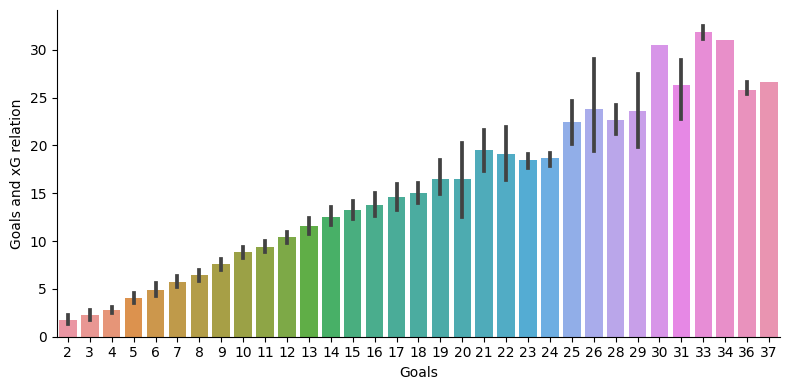

In [20]:
y = sns.catplot (x= "Goals", y="xG",data = data,kind = "bar",height=4, aspect=2)
y.set_ylabels("Goals and xG relation")
plt.show()

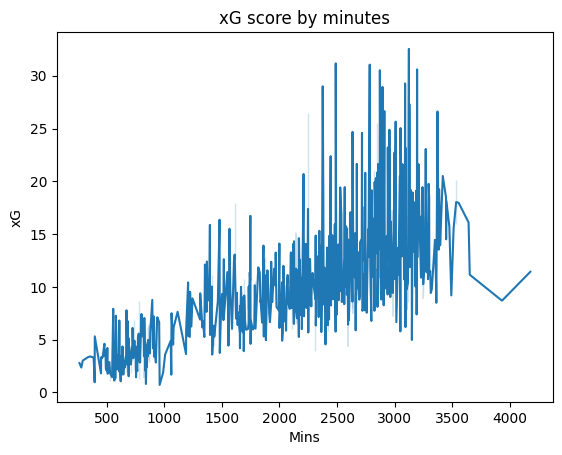

In [21]:
sns.lineplot(x="Mins", y="xG", data=data)
plt.title('xG score by minutes')
plt.show()

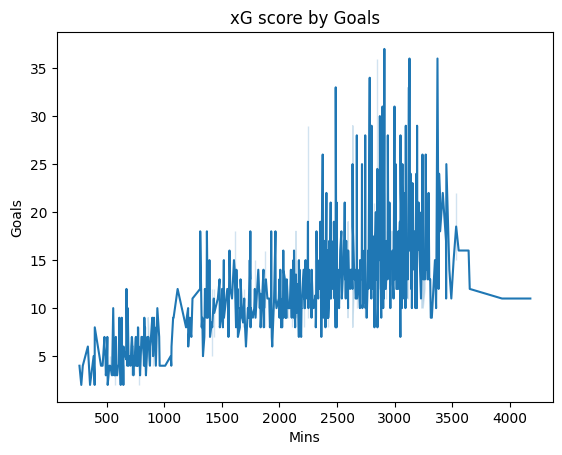

In [22]:
sns.lineplot(x="Mins", y="Goals", data=data)
plt.title('xG score by Goals')
plt.show()

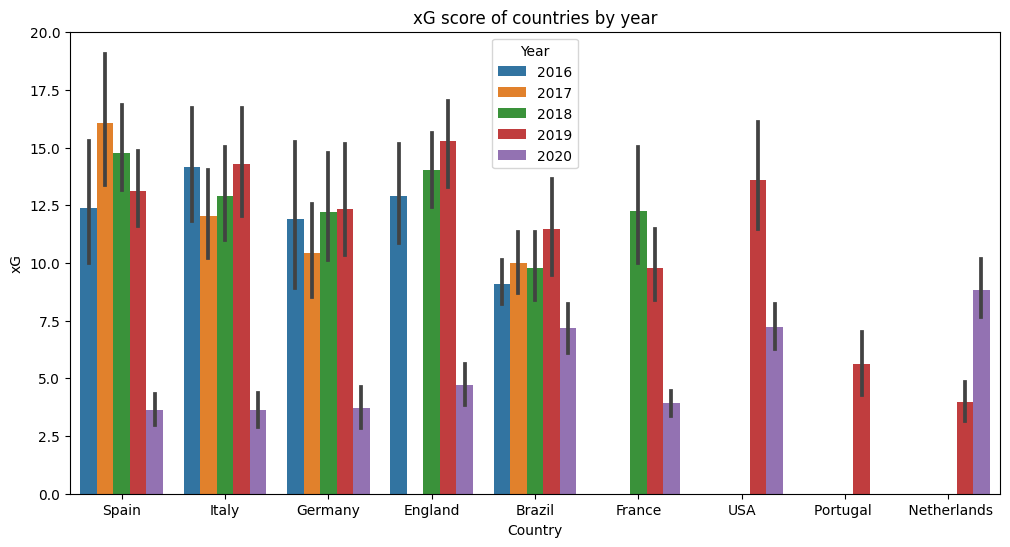

In [23]:

plt.figure(figsize=(12, 6))
sns.barplot(x="Country",y="xG",hue="Year",data=data)
plt.title('xG score of countries by year')
plt.show()


Some countries do not have data for some years

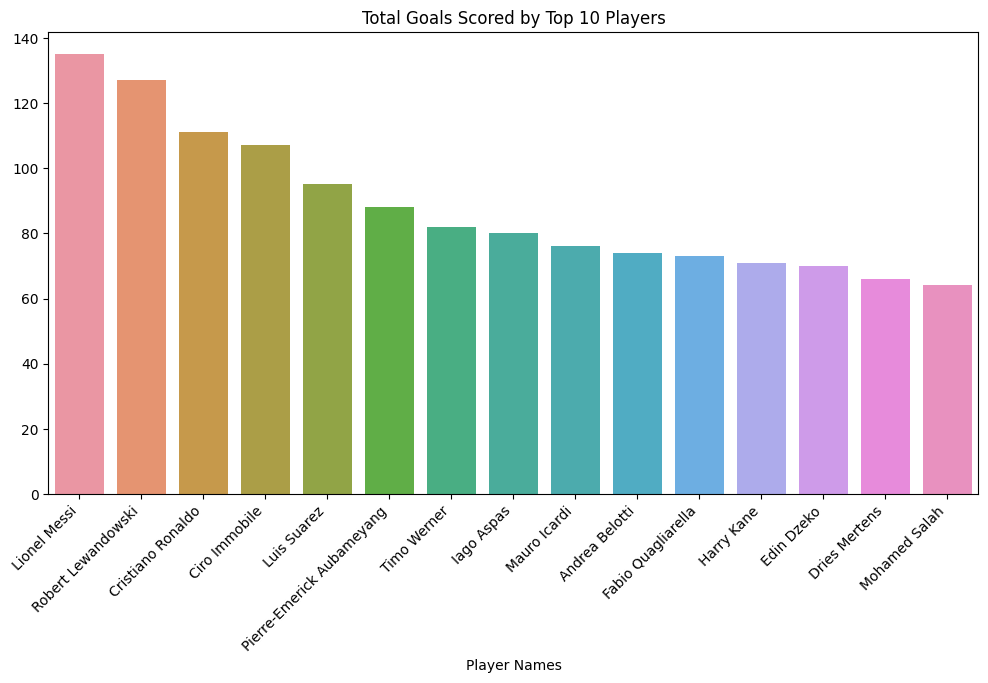

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x=total_goals_by_player.index[:15], y=total_goals_by_player.values[:15])
plt.xticks(rotation=45, ha="right")
plt.title('Total Goals Scored by Top 10 Players')
plt.show()


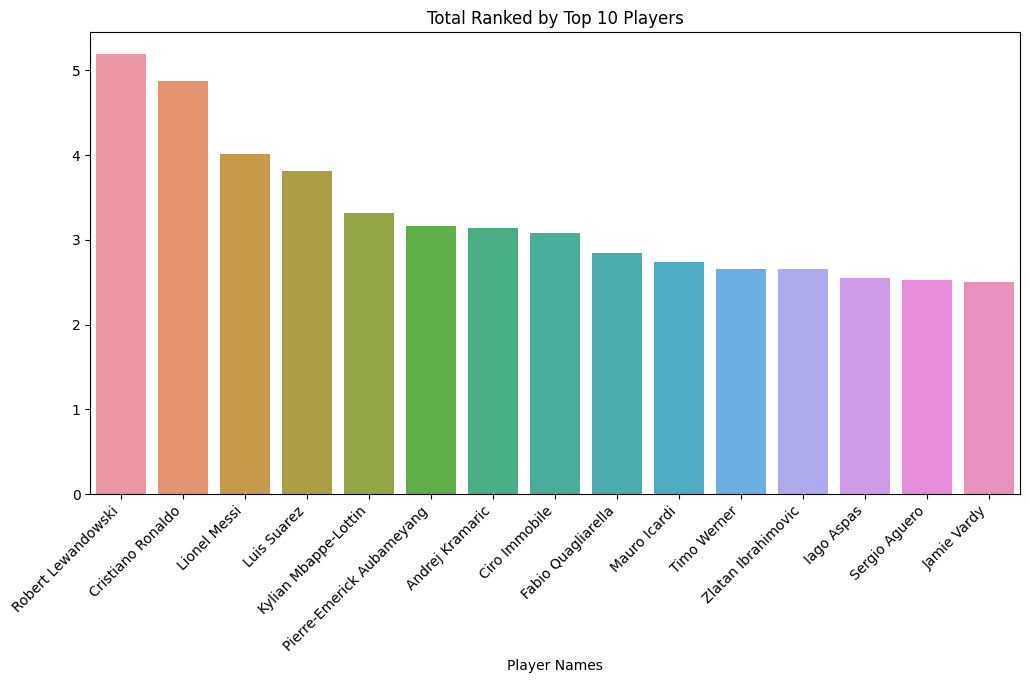

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(x=total_ranked_by_player.index[:15], y=total_ranked_by_player.values[:15])
plt.xticks(rotation=45, ha="right")
plt.title('Total Ranked by Top 10 Players')
plt.show()


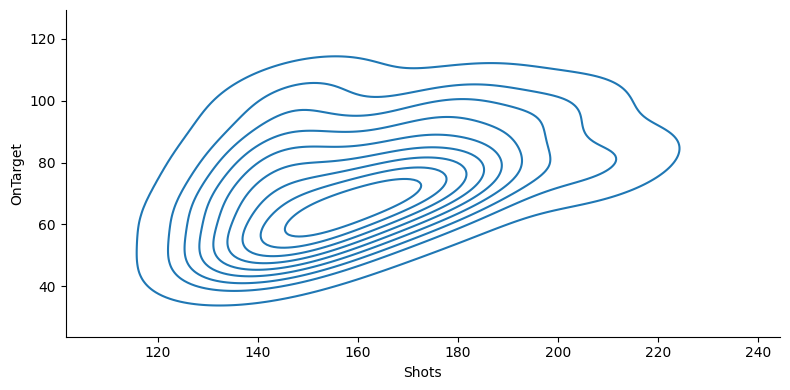

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Veriyi Shots sütununa göre sırala
sorted_data = data.sort_values(by='Shots', ascending=False)

# Sadece ilk 20 satırı seç
top_20_data = sorted_data.head(20)

# KDE çizimi
sns.displot(top_20_data, x="Shots", y="OnTarget", kind="kde", height=4, aspect=2)

# Grafiği göster
plt.show()


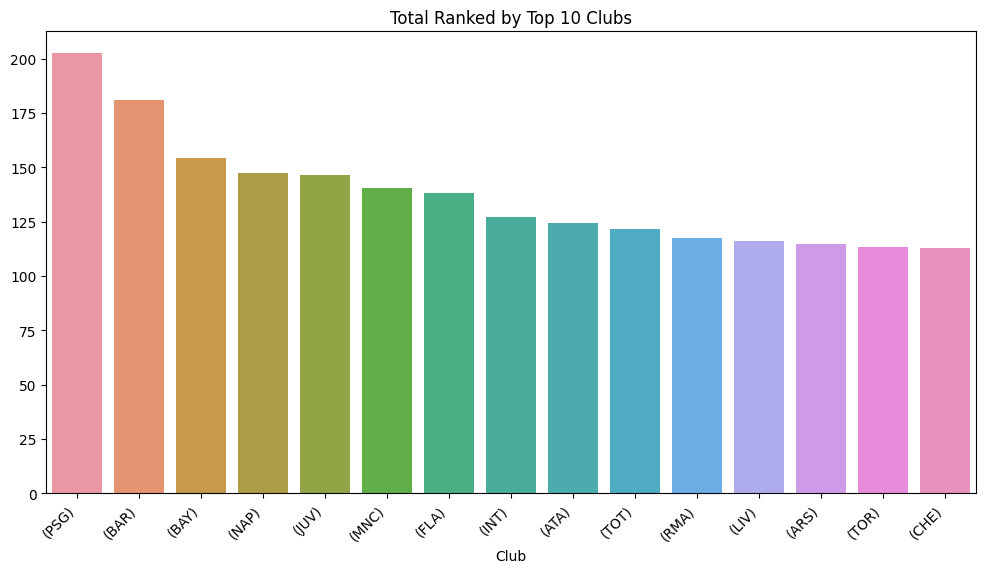

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(x=the_best_teams.index[:15], y=the_best_teams.values[:15])

plt.xticks(rotation=45, ha="right")
plt.title('Total Ranked by Top 10 Clubs')
plt.show()


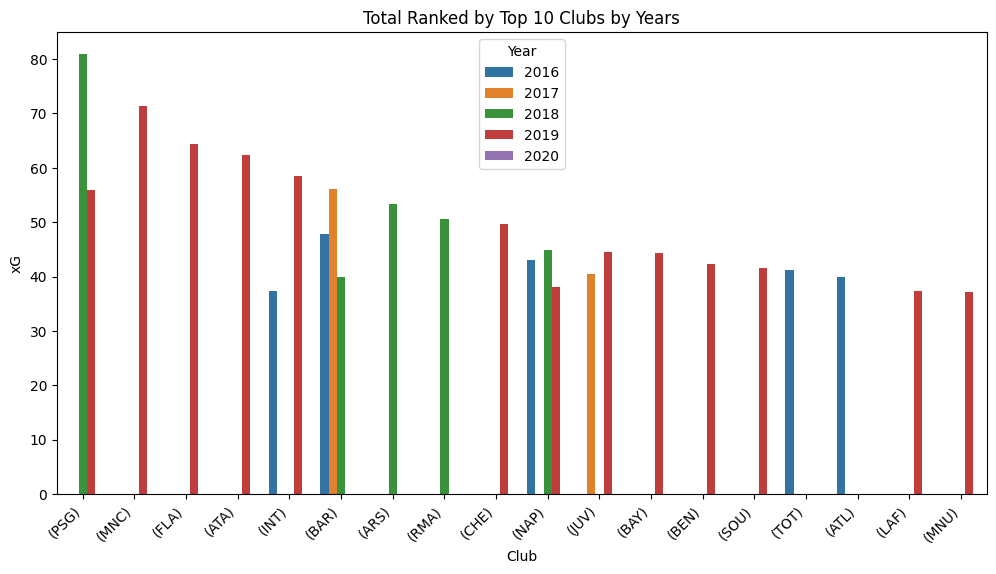

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(x=the_best_teams_by_year["Club"][:25], y=the_best_teams_by_year["xG"], hue = the_best_teams_by_year["Year"])

plt.xticks(rotation=45, ha="right")
plt.title('Total Ranked by Top 10 Clubs by Years')
plt.show()
